In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn
%matplotlib inline

## Ground Cricket Chirps

In The Song of Insects (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures. Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature. Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.
In general, it was found that crickets did not sing at temperatures colder than 60° F or warmer than 100° F.

In [3]:

ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data: If the ground temperature reached 95° F, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

### The equation for linear regression:

y=b0b1x
b1 = [(xvalue - xmean)(yvalue - ymean)/(xvalue - xmean)^2]
b0 = ymean - (b1 x xmean)

In [4]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


### Charting the Data

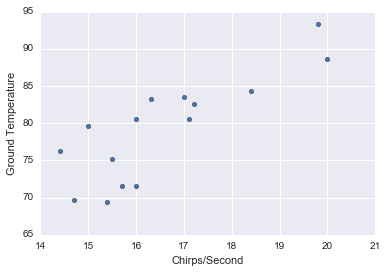

In [5]:
df.plot.scatter(x ='Chirps/Second', y ='Ground Temperature')

In [6]:
cricket_chirps = linear_model.LinearRegression()

In [7]:
cricket_chirps.fit(df[['Ground Temperature']], df[['Chirps/Second']])

/usr/local/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### *The R2 score is less than .8, suggesting a weak correlation.*

In [8]:
cricket_chirps.score(df[['Chirps/Second']], df[['Ground Temperature']])

-123.91525479028779

### According to the algorithm, we can predict about 20 chirps per second at 95 degrees.

In [9]:
cricket_chirps.predict(95)

array([[ 19.74428913]])

### Now we need to reverse the prediction model to predict temperature for chirps per second

In [10]:
crickets = linear_model.LinearRegression()

In [11]:
crickets.fit(df[['Chirps/Second']], df[['Ground Temperature']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### According to the algorithm, we can predict a temperature of 84.23 degrees for 18 chirps/second.

In [12]:
crickets.predict(18)

array([[ 84.2347963]])

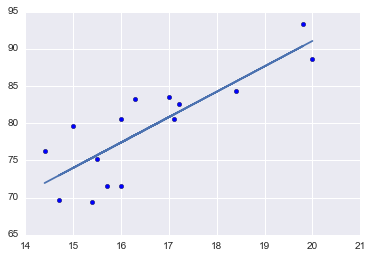

In [13]:
plt.scatter(df['Chirps/Second'].reshape(-1,1), df['Ground Temperature'].reshape(-1,1))
plt.plot(df['Chirps/Second'].reshape(-1,1), crickets.predict((df['Chirps/Second'].reshape(-1,1))))

## Brain vs. Body Weight

In the file brain_body.txt, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [14]:
df2 = pd.read_fwf("brain_body.txt")

In [15]:
df2.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


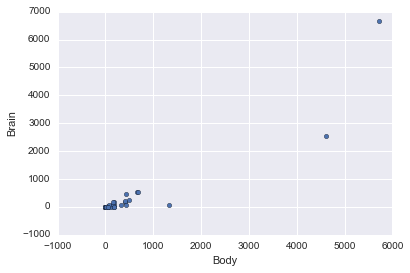

In [16]:
df2.plot.scatter(x ='Body', y ='Brain')

In [17]:
brain = linear_model.LinearRegression()

In [18]:
brain.fit(df2[['Body']], df2[['Brain']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

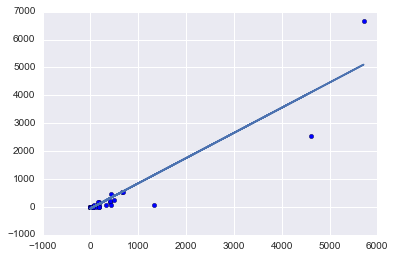

In [19]:
plt.scatter(df2['Body'].reshape(-1,1), df2['Brain'].reshape(-1,1))
plt.plot(df2['Body'].reshape(-1,1), brain.predict((df2['Body'].reshape(-1,1))))

In [20]:
brain.score(df2[['Body']], df2[['Brain']])

0.87266208430433312

A strong correlation

## Salary Discrimination

The file salary.txt contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best R2 score.
3. Report whether sex is a factor in salary. Support your argument with graph(s) if appropriate.

In [21]:
df3 = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [22]:
df3.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [23]:
gender = linear_model.LinearRegression()

Create new frame with just desired columns except salary.

In [24]:
new_frame = df3[['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']]

Create learning algorithm with new frame as x value, and Salary column as Y value.

In [25]:
gender.fit(new_frame, df3['Salary'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

R^2 correlation for all factors to Salary

In [26]:
gender.score(new_frame, df3['Salary'])

0.85471806744109691

Predicting salary for someone meeting passed in criteria

In [27]:
gender.predict([[0, 3, 25, 1, 35]])

array([ 34400.87095406])

### Years since Degree vs. Salary

In [28]:
years_since = linear_model.LinearRegression()

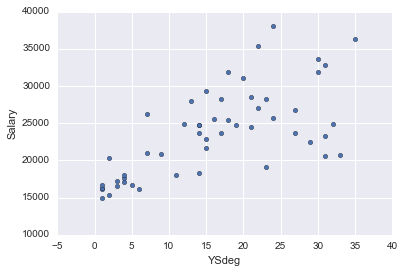

In [29]:
df3.plot.scatter(x='YSdeg', y='Salary')

In [30]:
years_since.fit(df3[['YSdeg']], df3[['Salary']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
years_since.score(df3[['YSdeg']], df3[['Salary']])

0.45542813458360276

**A decent correlation**

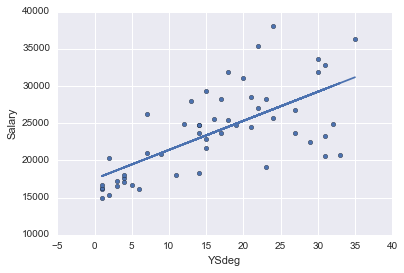

In [32]:
df3.plot.scatter(x='YSdeg', y='Salary')
plt.plot(df3['YSdeg'].reshape(-1,1), years_since.predict((df3['YSdeg'].reshape(-1,1))))

### Year in Position vs. Salary

In [33]:
year_of = linear_model.LinearRegression()

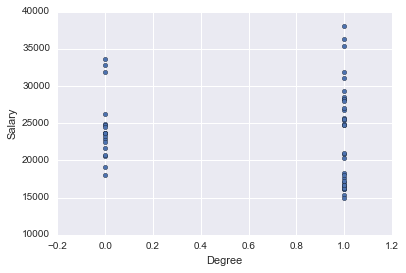

In [34]:
df3.plot.scatter(x='Degree', y='Salary')

In [35]:
year_of.fit(df3[['Year']], df3[['Salary']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
year_of.score(df3[['Year']], df3[['Salary']])

0.49093702676921624

**Another decent correlation**

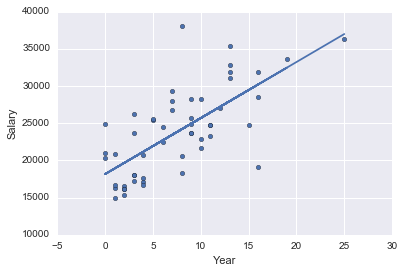

In [37]:
df3.plot.scatter(x='Year', y='Salary')
plt.plot(df3['Year'].reshape(-1,1), year_of.predict((df3['Year'].reshape(-1,1))))

### Rank vs. Salary

In [38]:
rank_salary = linear_model.LinearRegression()

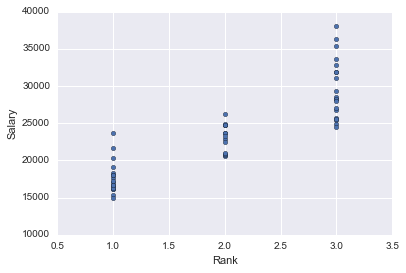

In [39]:
df3.plot.scatter(x='Rank', y='Salary')

In [40]:
rank_salary.fit(df3[['Rank']], df3[['Salary']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
rank_salary.score(df3[['Rank']], df3[['Salary']])

0.75253605392746314

**A high correlation**

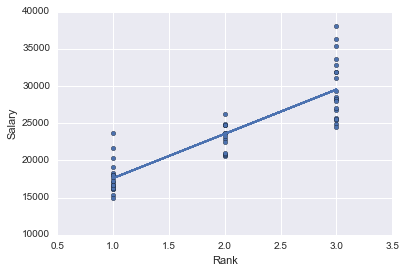

In [42]:
df3.plot.scatter(x='Rank', y='Salary')
plt.plot(df3['Rank'].reshape(-1,1), rank_salary.predict((df3['Rank'].reshape(-1,1))))

### Degree vs. Salary

In [43]:
degree_salary = linear_model.LinearRegression()

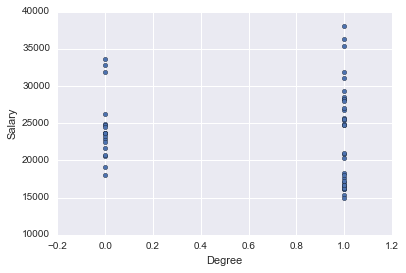

In [44]:
df3.plot.scatter(x='Degree', y='Salary')

In [45]:
degree_salary.fit(df3[['Degree']], df3[['Salary']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
degree_salary.score(df3[['Degree']], df3[['Salary']])

0.0048616809847483742

**A very weak correlation**

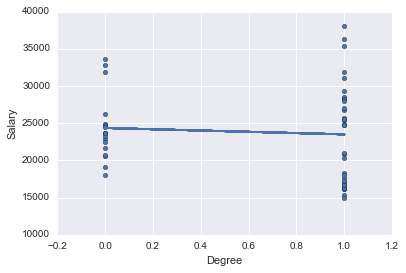

In [47]:
df3.plot.scatter(x='Degree', y='Salary')
plt.plot(df3['Degree'].reshape(-1,1), degree_salary.predict((df3['Degree'].reshape(-1,1))))

### Sex vs. Salary

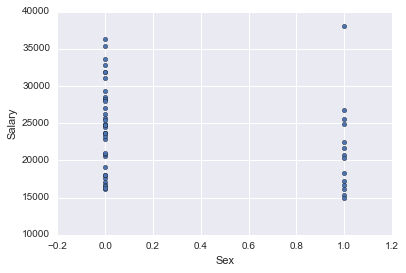

In [48]:
df3.plot.scatter(x='Sex', y='Salary')

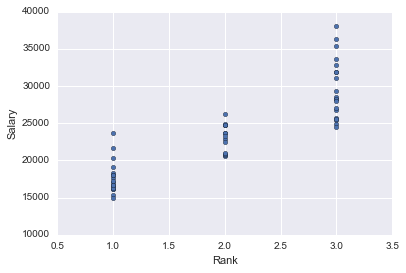

In [49]:
df3.plot.scatter(x='Rank', y='Salary')

In [50]:
gender_salary = linear_model.LinearRegression()

In [51]:
gender_salary.fit(df3[['Sex']], df3[['Salary']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
gender_salary.score(df3[['Sex']], df3[['Salary']])

0.063898925832880038

**A very weak correlation**

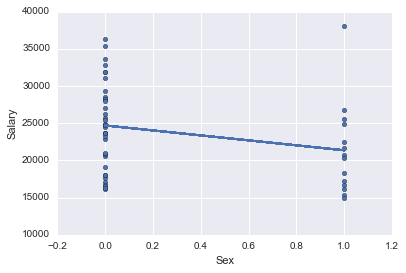

In [53]:
df3.plot.scatter(x='Sex', y='Salary')
plt.plot(df3['Sex'].reshape(-1,1), gender_salary.predict((df3['Sex'].reshape(-1,1))))

### Rank appears to have the highest correlation to salary. Let us now look at rank versus sex.

In [54]:
rank_sex = linear_model.LinearRegression()

In [55]:
rank_sex.fit(df3[['Sex']], df3[['Rank']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
rank_sex.score(df3[['Sex']], df3[['Rank']])

0.053089112232915237

**A weak correlation between sex and rank. This suggests that there is no bias towards one sex over the other for attaining rank.**